# 1. Introduction

# 2. Script

In [185]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

In [576]:
def insta_like(image,instafilter):
    if instafilter == 'gotham':
        image = cv2.imread(image,1)
        image = image/255
        b, g, r = cv2.split(image)
        image = np.stack([r, g, b], axis=2)
        # The (now-defunct) Gotham filter from Instagram is like this:
        # 1.A mid-tone contrast boost
        r_boost_lower = channel_adjust(r, [0, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 0.95, 1.0])
        # 2.Make the blacks a little bluer
        bluer_blacks = np.stack([r_boost_lower, g, np.clip(b + 0.03, 0, 1.0)], axis=2)
        # 3.A small sharpening
        sharper = sharpen(bluer_blacks, 1.3, 0.3)
        r, g, b = cv2.split(sharper)
        b_adjusted = channel_adjust(b, [0, 0.047, 0.118, 0.251, 0.318, 0.392, 0.42, 0.439, 0.475, 0.561, 0.58, 0.627, 0.671, 0.733, 0.847, 0.925, 1])
        
        # 4.A boost in blue channel for lower mid-tones and decrease in blue channel for upper mid-tones.
        gotham = np.stack([r, g, b_adjusted], axis=2)
        return gotham
    
    elif instafilter == 'inkwell':
        #The Greyscale Image of the original one
        inkwell = cv2.imread(image,0)
        #b, g, r = cv2.split(inkwell)
        #inkwell = np.stack([r, g, b], axis=2)
        return inkwell
    
    elif instafilter == 'lily':
        #decreasing Red Channel 
        lily = cv2.imread(image,1)
        lily[:,:,2] = lily[:,:,2] * 0.11
        #decreasing contrast
        lily = lily * 0.002  ##contrast = image * x_contrast
        #brightening
        lily = lily + 2.3 ##bright = image_contrast + x_bright
        return lily
    
    elif instafilter == 'poprocket':
        poprocket = cv2.imread(image,1)
        poprocket[:,:,2] = poprocket[:,:,2] * 0.18
        poprocket[:,:,1] = poprocket[:,:,1] * 0.01
        #poprocket[:,:,0] = poprocket[:,:,0] * 0.18
        #poprocket = poprocket * 0.0140  ##contrast = image * x_contrast
        poprocket = poprocket + 1.2 ##bright = image_contrast + x_bright
        return poprocket
    
    elif instafilter == 'walden':
        walden = cv2.imread(image,1)
        walden[:,:,2] = walden[:,:,2] * 1.212
        
        return walden
    
    elif instafilter == 'hefe':
        hefe = cv2.imread(image,1)
        hefe[:,:,2] = hefe[:,:,2] * 0.001
        hefe[:,:,1] = hefe[:,:,1] * 0.02
        hefe[:,:,0] = hefe[:,:,0] * 0.018
        hefe1 = hefe * 1.0 ##contrast = image * x_contrast
        hefe2 = hefe1 + 0.0 ##bright = image_contrast + x_bright
        return hefe2
        
        
        
        

# 3.0 Original Image

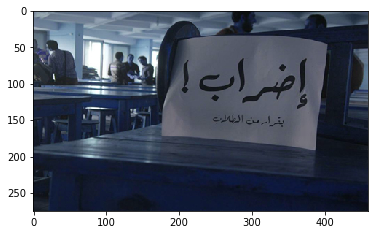

In [439]:
ii = cv2.imread('2013-635209067559524479-952.jpg',1)
plt.imshow(ii)
plt.show()

# 3.1 Gotham Filter

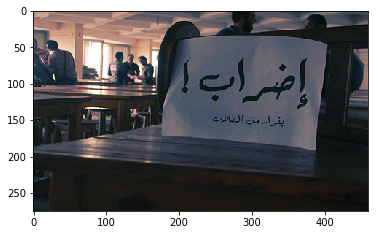

In [340]:
ii = insta_like('2013-635209067559524479-952.jpg','gotham')
plt.imshow(ii)
plt.show()

# 3.2 Inkwell Filter

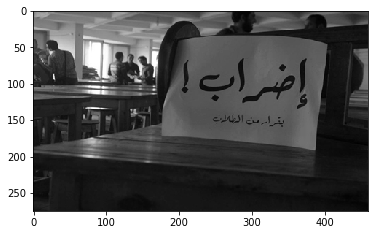

In [341]:
ii = insta_like('2013-635209067559524479-952.jpg','inkwell')
plt.imshow(ii,'gray')
plt.show()

# 3.3 Lily Filter

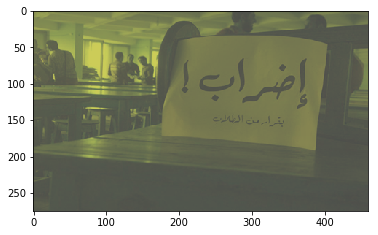

In [349]:
ii = insta_like('2013-635209067559524479-952.jpg','lily')
plt.imshow(ii)
plt.show()

# 3.4 Poprocket Filter

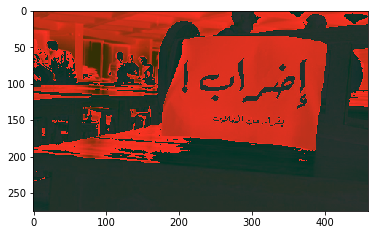

In [486]:
ii = insta_like('2013-635209067559524479-952.jpg','poprocket')
plt.imshow(ii)
plt.show()

# 3.5 Walden Filter

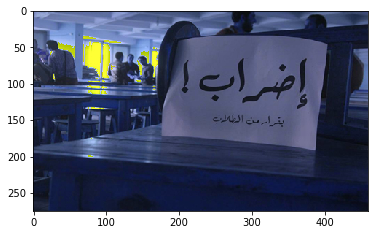

In [489]:
ii = insta_like('2013-635209067559524479-952.jpg','walden')
plt.imshow(ii)
plt.show()

# 3.6 Hefe Filter

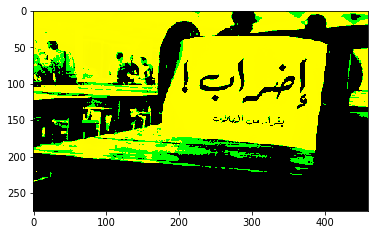

In [577]:
ii = insta_like('2013-635209067559524479-952.jpg','hefe')
plt.imshow(ii)
plt.show()